# Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure

In this document we reperform some of the analysis provided in 
*Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure* by *Siddhartha R. Dalal, Edward B. Fowlkes, Bruce Hoadley* published in *Journal of the American Statistical Association*, Vol. 84, No. 408 (Dec., 1989), pp. 945-957 and available at http://www.jstor.org/stable/2290069. 

On the fourth page of this article, they indicate that the maximum likelihood estimates of the logistic regression using only temperature are: $\hat{\alpha}=5.085$ and $\hat{\beta}=-0.1156$ and their asymptotic standard errors are $s_{\hat{\alpha}}=3.052$ and $s_{\hat{\beta}}=0.047$. The Goodness of fit indicated for this model was $G^2=18.086$ with 21 degrees of freedom. Our goal is to reproduce the computation behind these values and the Figure 4 of this article, possibly in a nicer looking way.

## Technical information on the computer on which the analysis is run

We will be using the python3 language using the pandas, statsmodels, numpy, matplotlib and seaborn libraries.

In [8]:
def print_imported_modules():
    import sys
    for name, val in sorted(sys.modules.items()):
        if(hasattr(val, '__version__')): 
            print(val.__name__, val.__version__)
#        else:
#            print(val.__name__, "(unknown version)")
def print_sys_info():
    import sys
    import platform
    print(sys.version)
    print(platform.uname())

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

print_sys_info()
print_imported_modules()

3.9.17 (main, Jun 20 2023, 19:27:40) 
[Clang 14.0.0 (clang-1400.0.29.202)]
uname_result(system='Darwin', node='simons-MacBook-Pro.local', release='21.0.1', version='Darwin Kernel Version 21.0.1: Tue Sep 14 20:56:24 PDT 2021; root:xnu-8019.30.61~4/RELEASE_ARM64_T6000', machine='arm64')
IPython 8.8.0
IPython.core.release 8.8.0
PIL 9.4.0
PIL.Image 9.4.0
PIL._deprecate 9.4.0
PIL._version 9.4.0
_csv 1.0
_ctypes 1.1.0
_curses b'2.2'
decimal 1.70
_pydev_bundle.fsnotify 0.1.5
_pydevd_frame_eval.vendored.bytecode 0.13.0.dev
appnope 0.1.3
argparse 1.1
backcall 0.2.0
cffi 1.15.1
comm 0.1.2
csv 1.0
ctypes 1.1.0
ctypes.macholib 1.0
cycler 0.10.0
dateutil 2.8.2
debugpy 1.6.5
debugpy.public_api 1.6.5
decimal 1.70
decorator 5.1.1
defusedxml 0.7.1
distutils 3.9.17
entrypoints 0.4
executing 1.2.0
executing.version 1.2.0
http.server 0.6
ipykernel 6.19.4
ipykernel._version 6.19.4
jedi 0.18.2
joblib 1.2.0
joblib.externals.cloudpickle 2.2.0
joblib.externals.loky 3.3.0
json 2.0.9
jupyter_client 7.4.8
jupyter

## Loading and inspecting data
Let's start by reading data.

In [45]:
if os.path.exists('data_shuttle.csv'):
    data = pd.read_csv('data_shuttle.csv')
else:
    data = pd.read_csv("https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/blob/master/data/shuttle.csv")

In [46]:
data.head()

Date  Count  Temperature  Pressure  Malfunction
0   4/12/81      6           66        50            0
1  11/12/81      6           70        50            1
2   3/22/82      6           69        50            0
3  11/11/82      6           68        50            0
4   4/04/83      6           67        50            0

We know from our previous experience on this data set that filtering data is a really bad idea. We will therefore process it as such.

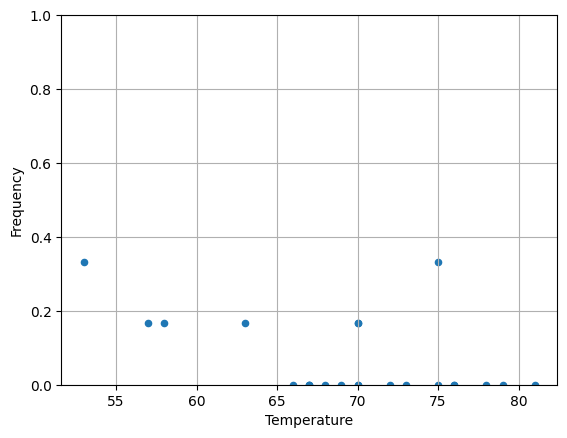

In [47]:
%matplotlib inline

pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data["Frequency"]=data.Malfunction/data.Count
data.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

## Logistic regression

Let's assume O-rings independently fail with the same probability which solely depends on temperature. A logistic regression should allow us to estimate the influence of temperature.

In [70]:
# We use add_constant to add intercept to our data
temps = data['Temperature'].values
temperature_with_intercept = sm.add_constant(temps, prepend=True)
temperature_with_intercept

array([[ 1., 66.],
       [ 1., 70.],
       [ 1., 69.],
       [ 1., 68.],
       [ 1., 67.],
       [ 1., 72.],
       [ 1., 73.],
       [ 1., 70.],
       [ 1., 57.],
       [ 1., 63.],
       [ 1., 70.],
       [ 1., 78.],
       [ 1., 67.],
       [ 1., 53.],
       [ 1., 67.],
       [ 1., 75.],
       [ 1., 70.],
       [ 1., 81.],
       [ 1., 76.],
       [ 1., 79.],
       [ 1., 75.],
       [ 1., 76.],
       [ 1., 58.]])

In [77]:
import statsmodels.api as sm

data["Success"]=data.Count-data.Malfunction
data["Intercept"]=1

freqs = data['Frequency'].values

logmodel=sm.GLM(freqs, temperature_with_intercept, 
                #family=sm.families.Binomial(sm.families.links.logit())).fit()
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.9210
Date:                Fri, 28 Jul 2023   Deviance:                       3.0144
Time:                        16:23:08   Pearson chi2:                     5.00
No. Iterations:                     6   Pseudo R-squ. (CS):            0.04355
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0850      7.477      0.680      0.496      -9.570      19.740
x1            -0.1156      0.115     -1.004      0.316      -0.341       0.110
==============================================================================
"""

The maximum likelyhood estimator of the intercept and of Temperature are thus $\hat{\alpha}=5.0849$ and $\hat{\beta}=-0.1156$. This **corresponds** to the values from the article of Dalal *et al.* The standard errors are $s_{\hat{\alpha}} = 7.477$ and $s_{\hat{\beta}} = 0.115$, which is **different** from the $3.052$ and $0.04702$ reported by Dallal *et al.* The deviance is $3.01444$ with 21 degrees of freedom. I cannot find any value similar to the Goodness of fit ($G^2=18.086$) reported by Dalal *et al.* There seems to be something wrong. Oh I know, I haven't indicated that my observations are actually the result of 6 observations for each rocket launch. Let's indicate these weights (since the weights are always the same throughout all experiments, it does not change the estimates of the fit but it does influence the variance estimates).

In [78]:
logmodel = sm.GLM(freqs, temperature_with_intercept, 
                #family=sm.families.Binomial(sm.families.links.logit())).fit()
                family=sm.families.Binomial(sm.families.links.Logit()),
               var_weights=data['Count'].values).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.526
Date:                Fri, 28 Jul 2023   Deviance:                       18.086
Time:                        16:24:02   Pearson chi2:                     30.0
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2344
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0850      3.052      1.666      0.096      -0.898      11.068
x1            -0.1156      0.047     -2.458      0.014      -0.208      -0.023
==============================================================================
"""

Good, now I have recovered the asymptotic standard errors $s_{\hat{\alpha}}=3.052$ and $s_{\hat{\beta}}=0.047$.
The Goodness of fit (Deviance) indicated for this model is $G^2=18.086$ with 21 degrees of freedom (Df Residuals).

**I have therefore managed to fully replicate the results of the Dalal *et al.* article**.

## Predicting failure probability
The temperature when launching the shuttle was 31°F. Let's try to estimate the failure probability for such temperature using our model.:

In [80]:
# New temperatures
new_temperature_data = np.linspace(start=30, stop=90, num=121)
new_temperature_with_intercept = sm.add_constant(new_temperature_data, prepend=True)

# Predictions using previous model
predictions = logmodel.predict(new_temperature_with_intercept)

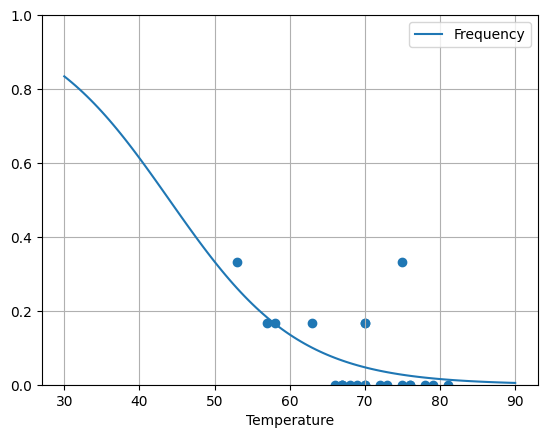

In [81]:
%matplotlib inline

# Data into DataFrame
data_pred = pd.DataFrame({'Temperature': new_temperature_data, 'Intercept': 1})
data_pred['Frequency'] = predictions


data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

This figure is very similar to the Figure 4 of Dalal *et al.* **I have managed to replicate the Figure 4 of the Dalal *et al.* article.**

## Computing and plotting uncertainty

Following the documentation of [Seaborn](https://seaborn.pydata.org/generated/seaborn.regplot.html), I use regplot.

/Users/simondelarue/Documents/PhD/Research/Envs/bgdia703/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/simondelarue/Documents/PhD/Research/Envs/bgdia703/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/simondelarue/Documents/PhD/Research/Envs/bgdia703/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/simondelarue/Documents/PhD/Research/Envs/bgdia703/lib/python3.9/site-packages/statsmodels/genmod/generalized

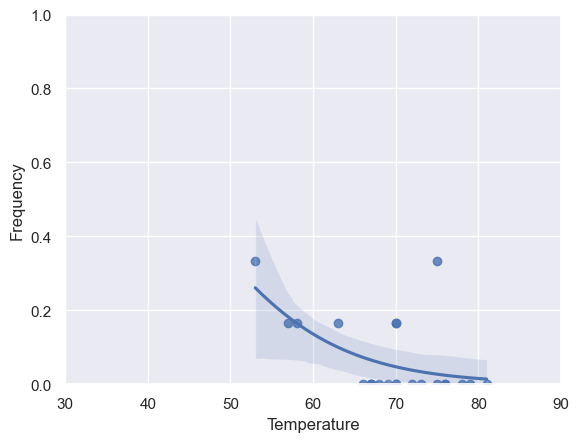

In [82]:
sns.set(color_codes=True)
plt.xlim(30,90)
plt.ylim(0,1)
sns.regplot(x='Temperature', y='Frequency', data=data, logistic=True)
plt.show()

I am not able to reproduce the figure below, maybe due to updates in `Seaborn` package, which does not compute parameters for regression when there is a perfect separation.

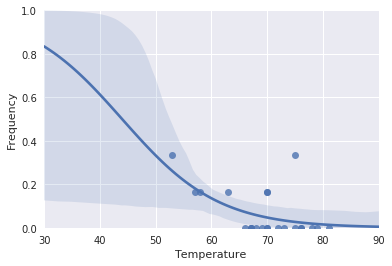

In [7]:
sns.set(color_codes=True)
plt.xlim(30,90)
plt.ylim(0,1)
sns.regplot(x='Temperature', y='Frequency', data=data, logistic=True)
plt.show()

**I think I have managed to correctly compute and plot the uncertainty of my prediction.** Although the shaded area seems very similar to [the one obtained by with R](https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/tree/master/challenger.pdf), I can spot a few differences (e.g., the blue point for temperature 63 is outside)... Could this be a numerical error ? Or a difference in the statistical method ? It is not clear which one is "right".